In [1]:
from google.colab import drive
drive.mount('/content/drive')   

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Google Cloud Platform - ML API 사용하기.

본 노트북은 [이 노트북](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/CPB100/lab4c/mlapis.ipynb)을 교육 과정에 맞추어 업그레이드한 버전인 것을 밝힙니다.


## Getting a Google API Credential.

처음 해야할 것은 Google Cloud APIs에 대한 사용 권한을 얻는 것!

프로젝트를 만들고 나면 [API console](http://console.cloud.google.com/apis)에서 좌측 메뉴의 "사용자 인증정보(Credentials)"를 클릭. 이후 "사용자 인증정보 생성(Create Credentials)"를 선택하고 어플리케이션을 위한 API key를 생성한다.

악용 방지를 위해 API의 사용을 특정 IP로 제한하는 등의 조치가 필요하나 현재 이 데모를 위해서는 신경쓰지 않기로 한다.


API key를 할당 받았으면, 아래 셀을 실행한 후 나오는 텍스트박스에 키를 입력한다.

In [2]:
import getpass 
APIKEY = getpass.getpass()

··········


API 콘솔에서, 왼쪽 메뉴의 "대시보드(Dashboard)"를 선택하고, "AI 및 서비스 사용 설정"를 클릭하세요.

프로젝트에 대해 다음 API들을 사용 가능하도록 설정하세요.
<ol>
<li> Google Translate API </li>
<li> Google Cloud Vision API </li>
<li> Google Natural Language API </li>
<li> Google Cloud Speech-to-text API </li>
</ol> 

## Translate API 호출

[Google Cloud Translation](https://cloud.google.com/translate/docs/) 문서를 확인.
[지원언어 목록](https://cloud.google.com/translate/docs/languages)

이는 Service의 형태로, 노트북이 실행되는 VM에서 translation이 수행되는 것이 아님.

클라우드 컴퓨팅의 강점 중 하나!

In [ ]:
# running Translate API
from googleapiclient.discovery import build
service = build('translate', 'v2', developerKey=APIKEY)

# use the service
#inputs = ['is it really this easy?', 'amazing technology', 'wow']
inputs = ['이게 정말 그렇게 쉬워?', '우리 집 강아지는 골든리트리버야.', '번역이 수행되는 것을 확인할 수 있습니다.']
outputs = service.translations().list(source='ko', target='es', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

이게 정말 그렇게 쉬워? -> ¿Es realmente así de fácil?
우리 집 강아지는 골든리트리버야. -> Mi perro es un golden retriever.
번역이 수행되는 것을 확인할 수 있습니다. -> Puedes ver que la traducción está hecha.


한일 번역도 잘 수행되는 것을 확인할 수 있음.

In [ ]:
outputs = service.translations().list(source='ko', target='ja', q=inputs).execute()
# print outputs
for input, output in zip(inputs, outputs['translations']):
  print(u"{0} -> {1}".format(input, output['translatedText']))

이게 정말 그렇게 쉬워? -> これは本当にそう簡単？
우리 집 강아지는 골든리트리버야. -> 私たちの家の犬はゴールデンレトリバーだよ。
번역이 수행되는 것을 확인할 수 있습니다. -> 翻訳が実行されることを確認することができます。


## Vision API 호출

[Vision API](https://cloud.google.com/vision/docs/)는 Cloud Storage에서 이미지를 처리하거나 POST 메시지에 직접 포함시킬 수 있음.

Vision API는 이미지 파일의 콘텐츠를 요청 본문에 [base64](https://cloud.google.com/vision/docs/base64)로 인코딩된 문자열로 전송하여 로컬 이미지 파일에서 기능 감지를 수행 가능함.

[request 안내](https://cloud.google.com/vision/docs/request)의 형태로 Vision API는 요청을 보냄.

<img src="https://storage.cloud.google.com/cloud-samples-data/vision/using_curl/shanghai.jpeg" width = "400"/>.


위 사진에 대해 Cloud Storage를 사용하고 OCR을 수행.

In [31]:
# Running Vision API
import base64
from googleapiclient.discovery import build
IMAGE="gs://cloud-samples-data/vision/using_curl/shanghai.jpeg"
#IMAGE="https://storage.cloud.google.com/cloud-samples-data/vision/using_curl/shanghai.jpeg"
# IMAGE='/content/sample_data/outfile.png'

vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
      "requests": [
        {
          "image": {
            "source": {
              "imageUri": IMAGE
            }
          },
          "features": [
            {
              "type": "LABEL_DETECTION",
              "maxResults": 3
            },
            {
              "type": "OBJECT_LOCALIZATION",
              "maxResults": 1
            },
            {
              "type": "TEXT_DETECTION",
              "maxResults": 1,
              "model": "builtin/latest"
            }
          ]
        }
      ]
    })
#responses = request.execute(num_retries=3)
responses = request.execute()
print('Label Annotations of LABEL_DETECTION')
print(len(responses['responses'][0]))
print(responses['responses'][0]['labelAnnotations'][0])
print(responses['responses'][0]['labelAnnotations'][1])
print(responses['responses'][0]['labelAnnotations'][2])
print()
print('Local Object Annotations of OBJECT_LOCALIZATION')
print(responses['responses'][0]['localizedObjectAnnotations'][0])
print()
print('Text Annotations of TEXT_DETECTION')
print(responses['responses'][0]['textAnnotations'][0])


TypeError: ignored

## 간판 OCR 및 번역

중국어 간판.. Google Cloud Vision API를 통해 읽은 후 번역해보자.

<img src="https://storage.googleapis.com/cloud-training-demos/vision/sign2.jpg" width = "400"/>.

In [29]:
# Running Vision API
import base64
# IMAGE="gs://cloud-training-demos/vision/sign2.jpg"
IMAGE='/content/sample_data/outfile.png'

vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                   'source': {
                        'gcs_image_uri': IMAGE
                    }
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 50,
                }]
            }],
        })
responses = request.execute(num_retries=3)
# print(responses['responses'][0]['textAnnotations'][0]['description'])
print(responses['responses'][0])

{'error': {'code': 3, 'message': 'Invalid GCS path specified: /content/sample_data/outfile.png'}}


In [36]:
with open(IMAGE, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

encoded_string

b'iVBORw0KGgoAAAANSUhEUgAAAlQAAANLCAIAAAAIDZSEAAG0iUlEQVR4nOz9ZXhU5/e+Dw+luAQrIbgWCV4suLt7gQIpUqC4e5FiCRC0uBenWKHBNWiR4FA0nyR4gAAJSZDv/3zmPn772M8Yk0AIyazrRY7Jni23rnNde7bE+7//+z+DSCQSiUSOpHgCP5FIJBI5mgR+IpFIJHI4CfxEIpFI5HAS+IlEIpHI4STwE4lEIpHDSeAnEolEIoeTwE8kEolEDieBn0gkEokcTgI/kUgkEjmcBH4ikUgkcjgJ/EQikUjkcBL4iUSi2KegoKCECROmSJEipgsiiq0S+IlEotgnAle8ePFiuhSiWCyBn0gkEokcTgI/kUgkEjmcBH4ikUgkcjgJ/EQikSg2SX7v/CwS+IlEIlFs0r1797Jnzx7TpYj1EviJRCKRyOEk8BOJRCKRw0ngJxKJRCKHk8BPJBKJRA4ngZ9IJBKJHE4CP5FIJBI5nAR+IpFIJHI4CfxEIpFI5HAS+IlEIpHI4STwE4ks6K1RSZMmjemCiESiaJHATySyoOfPnwcHB2fLlk0eoigSxUkJ/EQikUjkcBL4iUQikcjhJPATiUQikcNJ4CcSiUQih5PATyQSiUQOJ4GfSCQSiRxOAj+RSCQSOZwEfiKRSCRyOAn8RCKRSORwEviJRCKRKCb17t07Pz+/DBkyJEuW7IsdVOAnEolEopjUkydPhg4dWqRIkZ49e37zzTdf5qACP5FIJBLFmGBQv379vL29s2bN+s8//yRIkODLHFfgJxKJRKIYEwyaP39+mTJl8ufPnzhx4i92XIGfSCQSiRxOAj+RSCQSOZwEfiKRSCRyOAn8RCKRSORwEviJRCKRyOEk8BOJRCKRw0ngJxKJRCKHk8BPJBKJRA4ngZ9IJBKJHE4CP5FIJBI5nAR+IpFIJHI4CfxEIpFI5HAS+IlEIpHI4STwE4lEIpHDSeAnEolEIoeTwE8kEolEDi

In [40]:
# Running Vision API
import base64
# IMAGE="gs://cloud-training-demos/vision/sign2.jpg"
IMAGE='/content/sample_data/outfile.png'
with open(IMAGE, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode("utf-8")

vservice = build('vision', 'v1', developerKey=APIKEY)
request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                   'content':encoded_string
                },
                'features': [{
                    'type': 'TEXT_DETECTION',
                    'maxResults': 50,
                }]
            }],
        })
responses = request.execute(num_retries=3)
print(responses['responses'][0]['textAnnotations'][0]['description'])
# print(responses['responses'][0])


농협 (MH)감리용역 표준계약서
계약번호 : 제 294 호
용역계약명
계약금액 |금
금
계약보증금
NH 4 Tesseract Test
일 백반
오십 만원
원정( /,000, 000
원정(
S0 0, 000
|내 역 : 현금, 보증보험중권, 공제조합 지급보증서, 기타
| 1,000
지체상금율 |지체일수 1일에 대하여
계약기간 |계약체결일로부터
30
일(월) 이내
계약담당자와 계약상대자는 붙임의 계약서류에 의하여 위 감리용역에 대한
계약을 체결하고 신의에 따라 성실히 계약상의 의무를 이행할 것을 확약하며
이 계약의 중거로서 본 계약서를 작성하고 당사자가 기명날인한 후 각 1부씩
보관한다.
붙임 서류 : 1. 감리용역지 침서
2. 감리용역계약 일반조건
3. 감리용역계약 특수조건(필요시)
2020 년 7 월 2 일
계약담당자
성
소 : 서울시 용산구
명:
주
법인(사업자)등록번호 :
전 화 / FAX :
소 : 사울시, 강서구 아웃동 25-t-
명 : 정용기
계 약 자
주
성
법인(사업자)등록번호 :
전 화 / FAX :
B1o - 9055 -6273
braver Y



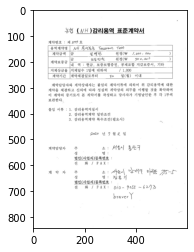

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(IMAGE)
plt.imshow(img)
plt.show()

대략 잘 인식한 것 같다.

In [ ]:
foreigntext = responses['responses'][0]['textAnnotations'][0]['description']
foreignlang = responses['responses'][0]['textAnnotations'][0]['locale']
print('Language Code = {}.  \nText:\n{}'.format(foreignlang,foreigntext))

Language Code = zh.  
Text:
请您爱护和保
护卫生创建优
美水环境



정보를 확인하면, 현재 중국어 간체로 인식했음을 확인할 수 있다.

해당 출력물에 아까 수행했던 translation API를 적용하면 아래와 같이 번역 결과를 얻을 수 있다.

In [ ]:
inputs=[foreigntext]
outputs = list()
outputs.append(service.translations().list(source=foreignlang, target='en', q=inputs).execute())
outputs.append(service.translations().list(source=foreignlang, target='ko', q=inputs).execute())
outputs.append(service.translations().list(source=foreignlang, target='ja', q=inputs).execute())
# print outputs
for output in outputs :
  print(u"{0} -> {1}".format(inputs[0], output, ))
  

请您爱护和保
护卫生创建优
美水环境
 -> {'translations': [{'translatedText': 'Please care for and protect sanitation to create a beautiful water environment'}]}
请您爱护和保
护卫生创建优
美水环境
 -> {'translations': [{'translatedText': '아름다운 물 환경을 조성하기 위해 위생을 관리하고 보호하십시오'}]}
请您爱护和保
护卫生创建优
美水环境
 -> {'translations': [{'translatedText': 'きれいな水環境をつくるために衛生管理と保護をお願いします'}]}


## Language API를 통한 감성 분석


[Google Cloud Natural Language API](https://cloud.google.com/natural-language/docs/) 를 사용하여 텍스트 감성을 분석해보자.

In [ ]:
lservice = build('language', 'v1', developerKey=APIKEY)
quotes = [
  '이 영화는 정말 재밌어! 다음에 또 보고싶구만.',
  '이거 진짜 별로임 제발 보지 마세요.',
  '말 같지도 않은 소리 하고있네',
  '다음에는 좀 더 잘할 수 있을거에요.', 
  '우와 너 잘하는구나!',
  '으이구 참 잘들하는 짓이다'
]
for quote in quotes:
  response = lservice.documents().analyzeSentiment(
    body={
      'document': {
         'type': 'PLAIN_TEXT',
         'content': quote
      }
    }).execute()
  score = response['documentSentiment']['score']
  magnitude = response['documentSentiment']['magnitude']
  print('SCORE=%s MAGNITUDE=%s for %s' % (score, magnitude, quote))

SCORE=0.7 MAGNITUDE=1.5 for 이 영화는 정말 재밌어! 다음에 또 보고싶구만.
SCORE=-0.6 MAGNITUDE=0.6 for 이거 진짜 별로임 제발 보지 마세요.
SCORE=0.8 MAGNITUDE=0.8 for 말 같지도 않은 소리 하고있네
SCORE=0.1 MAGNITUDE=0.1 for 다음에는 좀 더 잘할 수 있을거에요.
SCORE=0.9 MAGNITUDE=0.9 for 우와 너 잘하는구나!
SCORE=-0.6 MAGNITUDE=0.6 for 으이구 참 잘들하는 짓이다


[감정분석 가이드](https://cloud.google.com/natural-language/docs/basics#interpreting_sentiment_analysis_values) 에 따르면 Score는 전반적인 정서, Magnitude는 그 양입니다.

##VIsion API를 이용한 이미지의 인물 감정 분석A
> API 문서 참고 : https://cloud.google.com/vision/docs/detecting-faces
### Sample Images
<img src="https://cdn.pixabay.com/photo/2018/03/28/04/59/child-3268265_960_720.jpg" width = "300"/>
<figcaption>Image 1</figcaption>
<img src="https://cdn.pixabay.com/photo/2017/10/11/08/03/surprise-2840248_960_720.jpg" width = "300"/>
<figcaption>Image 2</figcaption>
<img src="https://cdn.pixabay.com/photo/2016/11/16/10/28/girl-1828541_960_720.jpg" width = "300"/>
<figcaption>Image 3</figcaption>

In [ ]:
def emotion_detector(apikey, image):
    vservice = build('vision', 'v1', developerKey=apikey)
    request = vservice.images().annotate(body={
        'requests': [{
                'image': {
                    'source': {
                        #'gcsImageUri': image
                        "imageUri": image
                    }
                },
                'features': [{
                    'type': 'FACE_DETECTION'
                }]
            }],
        })
    responses = request.execute()
    ## 추출되는 키값들.
    #print(responses['responses'][0]['faceAnnotations'][0].keys())
    annotation = responses['responses'][0]['faceAnnotations'][0]
    return {'Surprise':annotation['surpriseLikelihood'],
            'Joy':annotation['joyLikelihood'],
            'Sorrow':annotation['sorrowLikelihood']}

IMAGE1="https://cdn.pixabay.com/photo/2018/03/28/04/59/child-3268265_960_720.jpg"
IMAGE2="https://cdn.pixabay.com/photo/2017/10/11/08/03/surprise-2840248_960_720.jpg"
IMAGE3="https://cdn.pixabay.com/photo/2016/11/16/10/28/girl-1828541_960_720.jpg"
print(emotion_detector(APIKEY, IMAGE1))
print(emotion_detector(APIKEY, IMAGE2))
print(emotion_detector(APIKEY, IMAGE3))



{'Surprise': 'VERY_UNLIKELY', 'Joy': 'VERY_LIKELY', 'Sorrow': 'VERY_UNLIKELY'}
{'Surprise': 'VERY_LIKELY', 'Joy': 'VERY_UNLIKELY', 'Sorrow': 'VERY_UNLIKELY'}
{'Surprise': 'VERY_UNLIKELY', 'Joy': 'VERY_UNLIKELY', 'Sorrow': 'POSSIBLE'}


Copyright 2018 Google Inc.
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.